<a href="https://colab.research.google.com/github/sokanaid/CourseProject2022BiologicalMath/blob/main/data_smoothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Сглаживание результатов симуляций

In [23]:
import pandas as pd
import os
import matplotlib.pyplot as plt

## Чтение данных

In [5]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/sim_tables

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/sim_tables


In [15]:
def read_csv_file(directory_path, name):
  file_path = os.path.join(directory_path, name + ".csv")
  print("read file ", file_path)
  return pd.read_csv(file_path)

In [46]:
def read_files(directory_path):
  data = {}
  # численность популяции
  data["population"] = read_csv_file(directory_path, "population")
  data["population"].drop(data["population"].tail(1).index, inplace=True)
  # результаты последовательных сглаживаний численности популяции
  for count in range(1, 11):
    name = "exp_pop"+(str(count) if count!=1 else "")
    data[name] = read_csv_file(directory_path, name)
  return data

## Построение графиков

In [113]:
def print_smoothing(data):
  fig = plt.figure(figsize=(20, 30), dpi=80)
  plt.axis('off')
  plt.title("Sequential exponential smoothing results (a=0.25)")
  fig.tight_layout(pad=6.0,  h_pad=3, w_pad=3)
  fig.patch.set_visible(False)
  columns_count = 2
  axes = fig.subplots(nrows=12//columns_count, ncols=columns_count)

  axes[0, 0].plot(data["population"]['time'], data["population"]['pop'], "r", label="population")
  axes[0, 0].legend()
  axes[0, 0].set_xlabel('time')
  axes[0, 0].set_ylabel('pop')

  for count in range(1, 11):
    name = "exp_pop"+(str(count) if count!=1 else "")
    i, j = count//columns_count , count %columns_count
    axes[i, j].plot(data[name]['time'], data[name]["exp_pop" if count==1 else "exp_pop2"], label=name)
    axes[i, j].legend(loc="lower right")
    axes[i, j].set_xlabel('time')
    axes[i, j].set_ylabel('pop')
  fig.delaxes(axes[5, 1])


## Пример применения последовательного экспоненциального сглаживания с a=0.25


In [47]:
data = read_files("/content/drive/MyDrive/sim_tables/kurkin2/kurkin2dd_0.02_death_r0.2_auto_stop_at_plateau__b_0.2TRUE_initial_pop_10_sd_b_0.2_sd_d_0.7")

read file  /content/drive/MyDrive/sim_tables/kurkin2/kurkin2dd_0.02_death_r0.2_auto_stop_at_plateau__b_0.2TRUE_initial_pop_10_sd_b_0.2_sd_d_0.7/population.csv
read file  /content/drive/MyDrive/sim_tables/kurkin2/kurkin2dd_0.02_death_r0.2_auto_stop_at_plateau__b_0.2TRUE_initial_pop_10_sd_b_0.2_sd_d_0.7/exp_pop.csv
read file  /content/drive/MyDrive/sim_tables/kurkin2/kurkin2dd_0.02_death_r0.2_auto_stop_at_plateau__b_0.2TRUE_initial_pop_10_sd_b_0.2_sd_d_0.7/exp_pop2.csv
read file  /content/drive/MyDrive/sim_tables/kurkin2/kurkin2dd_0.02_death_r0.2_auto_stop_at_plateau__b_0.2TRUE_initial_pop_10_sd_b_0.2_sd_d_0.7/exp_pop3.csv
read file  /content/drive/MyDrive/sim_tables/kurkin2/kurkin2dd_0.02_death_r0.2_auto_stop_at_plateau__b_0.2TRUE_initial_pop_10_sd_b_0.2_sd_d_0.7/exp_pop4.csv
read file  /content/drive/MyDrive/sim_tables/kurkin2/kurkin2dd_0.02_death_r0.2_auto_stop_at_plateau__b_0.2TRUE_initial_pop_10_sd_b_0.2_sd_d_0.7/exp_pop5.csv
read file  /content/drive/MyDrive/sim_tables/kurkin2/kurk

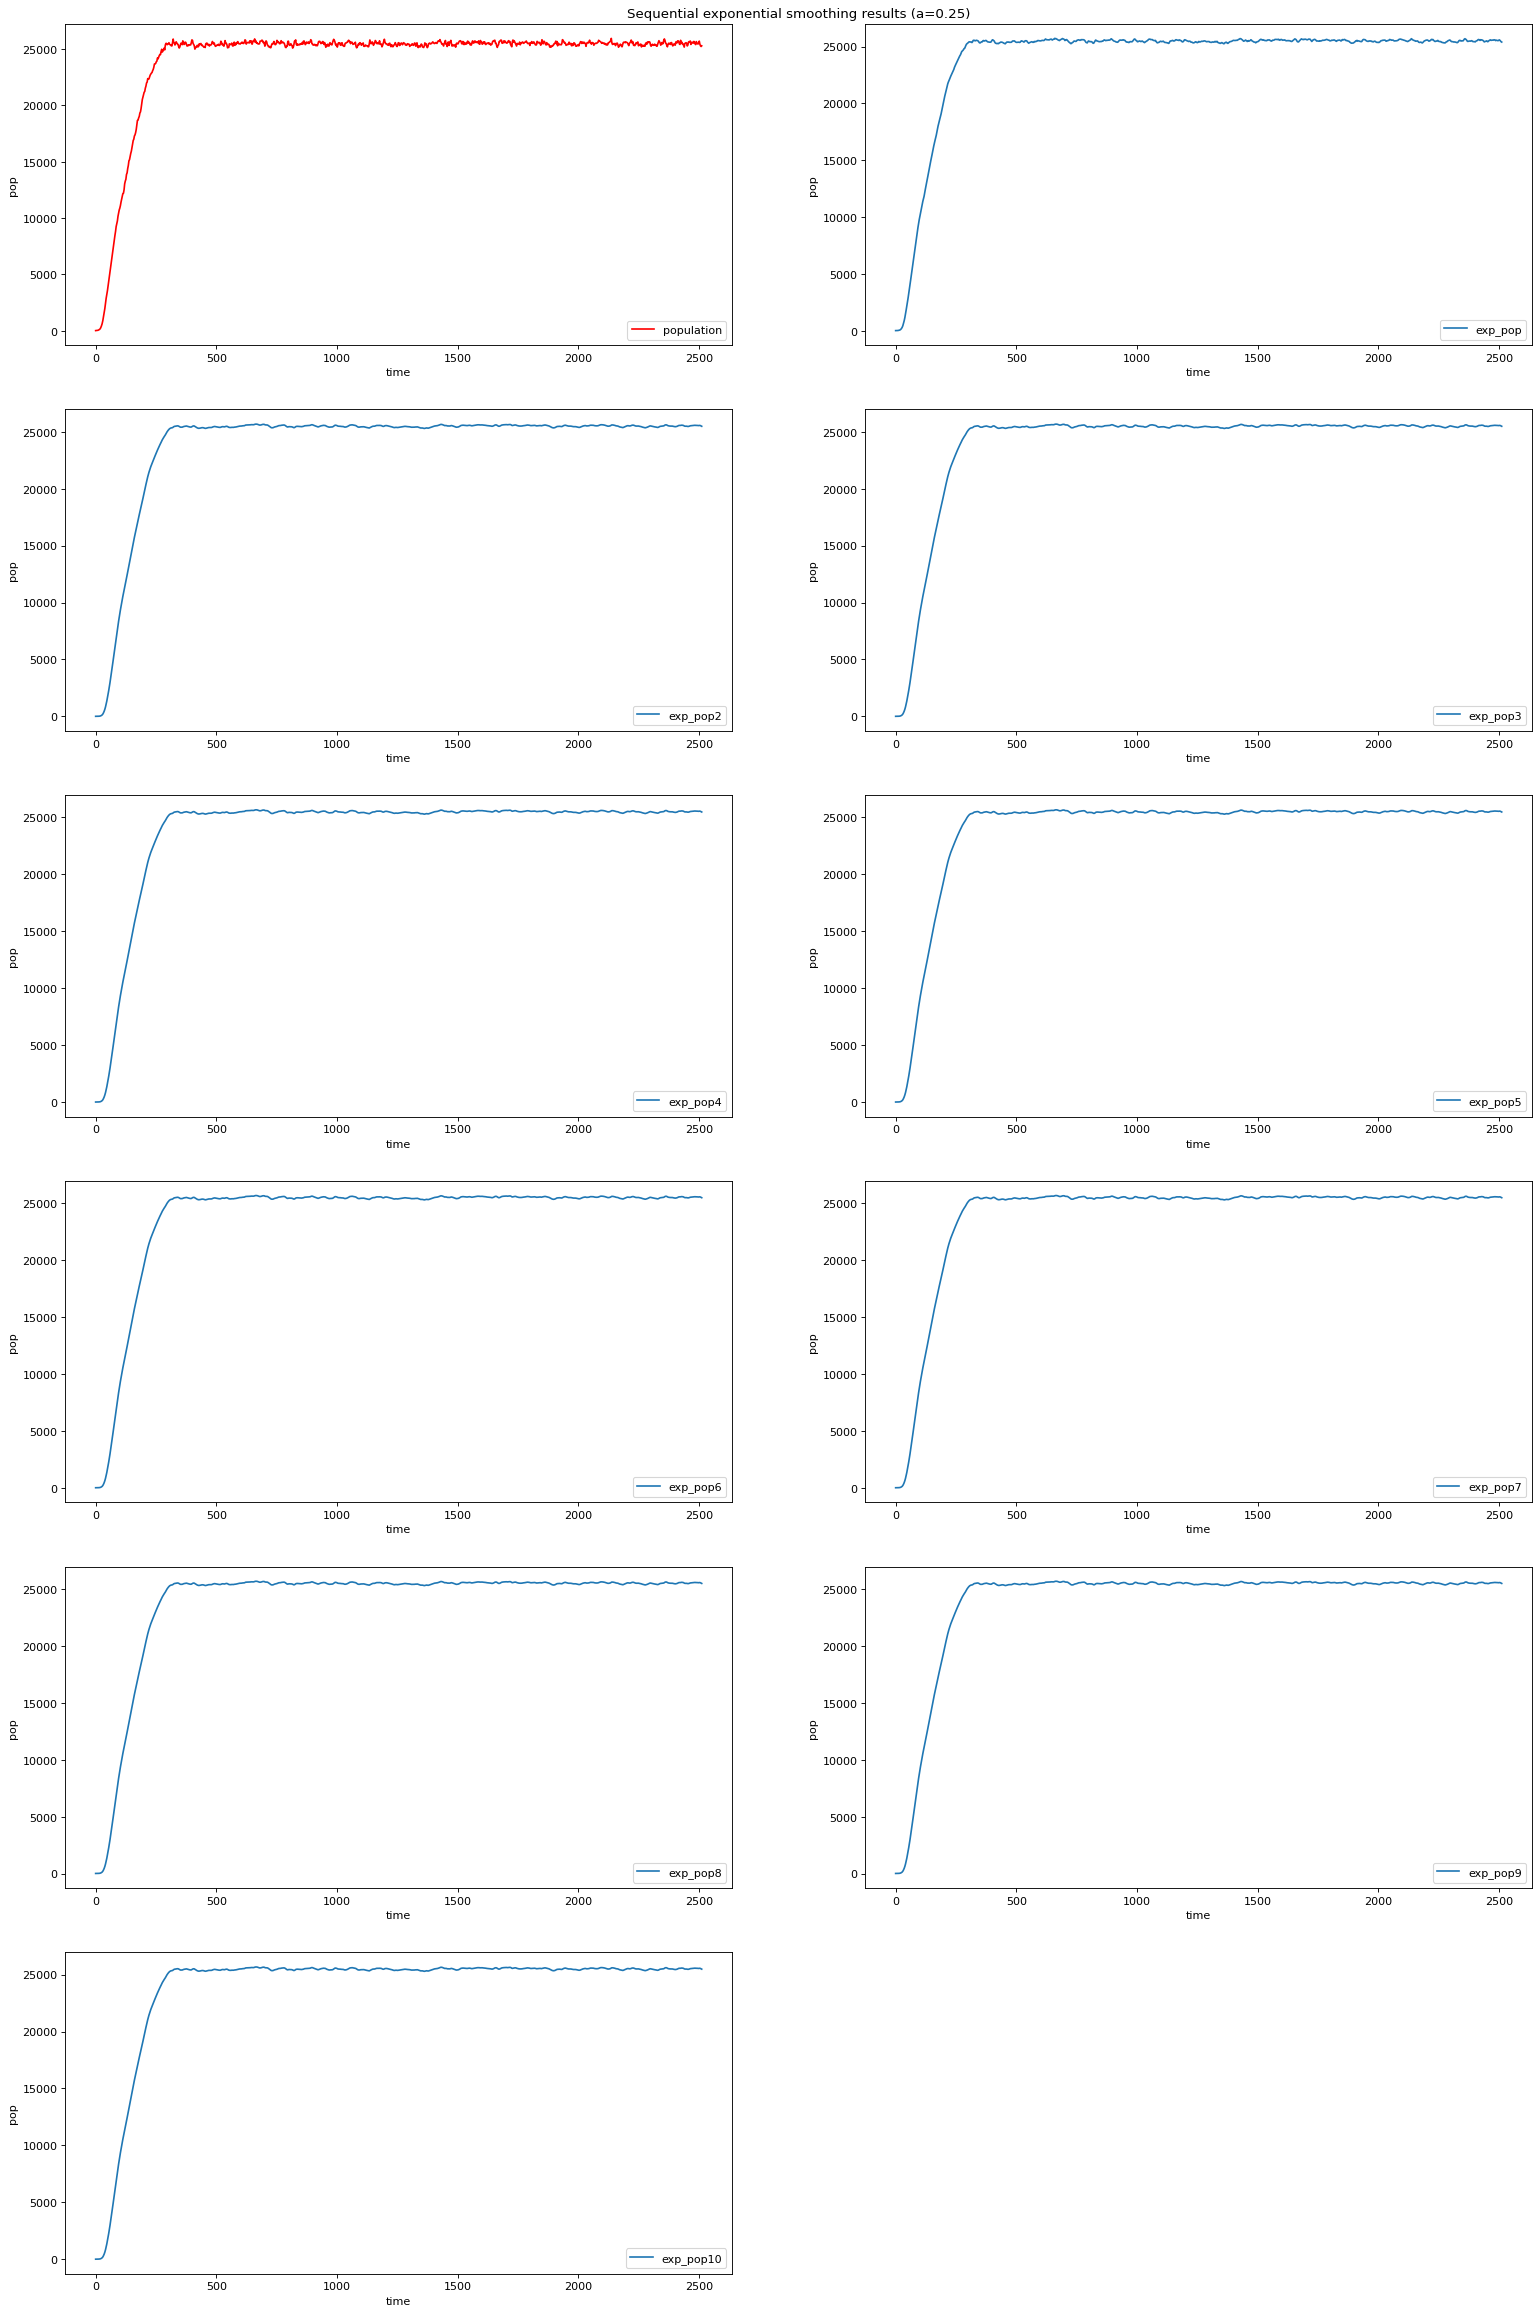

In [114]:
print_smoothing(data)